In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress
import plotly.graph_objects as go
from plotly.offline import iplot

In [2]:
# Store filepath in a variable
file_family_2016 = "Resources/2016.csv"

In [3]:
# Read Data files with the pandas library
d_2016 = pd.read_csv(file_family_2016, encoding="UTF-8")

In [5]:
# Load data that we will use.
d_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
d_2016.tail()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [8]:
d_2016.rename(columns = {"Happiness Rank" : "Happiness_Rank","Happiness Score":"Happiness_Score", "Standard Error":"Standard_Error"}, inplace = True)

d_2016.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

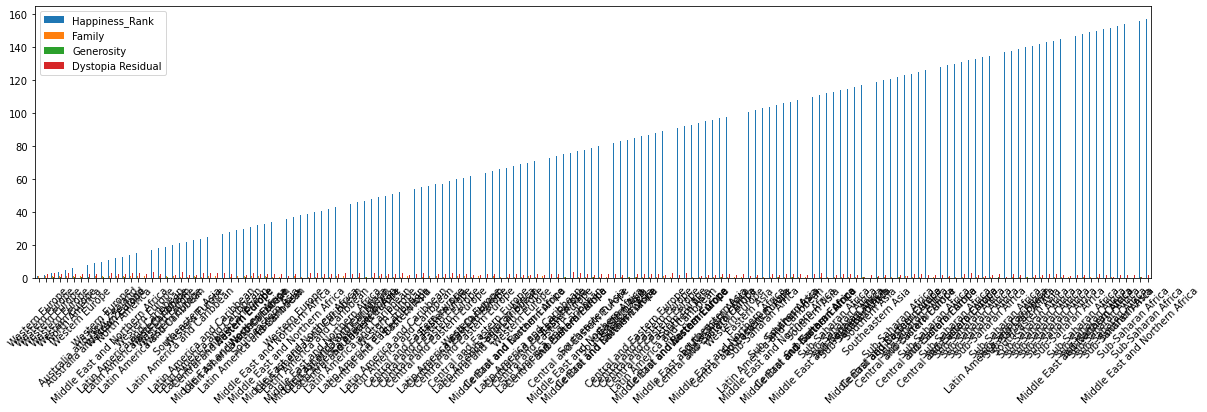

<Figure size 432x288 with 0 Axes>

In [28]:
# multiple plot

multi_plot =  data_2016.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(data_2016["Region"], rotation=45)

plt.show()
plt.tight_layout()

In [18]:
# Generosity and Family vs Happiness_Rank of Top 157 Countries in 2015

# prepare data frame
data_2016 = d_2016.iloc[:158,:]


# Creating trace1
trace1 = go.Scatter(
                    x = data_2016.Happiness_Rank,
                    y = data_2016.Generosity,
                    mode = "lines",
                    name = "Family",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= data_2016.Country)
# Creating trace2
trace2 = go.Scatter(
                    x = data_2016.Happiness_Rank,
                    y = data_2016.Family,
                    mode = "lines+markers",
                    name = "Generosity",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= data_2016.Country)
data = [trace1, trace2]
layout = dict(title = 'Family and Generosity vs Happiness Rank of Top 157 Countries',
              xaxis= dict(title= 'Happiness Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [21]:
df_WE = data_2016[data_2016.Region == 'Western Europe'].iloc[:158,:]
df_NA = data_2016[data_2016.Region == 'North America'].iloc[:158,:]
df_EA = data_2016[data_2016.Region == 'Eastern Asia'].iloc[:158,:]

# creating trace1
trace1 =go.Scatter(
                    x = df_WE.Happiness_Rank,
                    y = df_WE.Family,
                    mode = "markers",
                    name = "Western Europe",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df_WE.Country)

# creating trace2
trace2 =go.Scatter(
                    x = df_NA.Happiness_Rank,
                    y = df_NA.Family,
                    mode = "markers",
                    name = "North America",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df_NA.Country)
# creating trace3
trace3 =go.Scatter(
                    x = df_EA.Happiness_Rank,
                    y = df_EA.Family,
                    mode = "markers",
                    name = "Eastern Asia",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df_EA.Country)
data = [trace1, trace2, trace3]
layout = dict(title = 'Happiness Rank vs Family of top 157 Countries with 3 regions',
              xaxis= dict(title= 'Happiness Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Family',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
plt.savefig("images/Year2016_Happiness VS Family.png")
iplot(fig)

<Figure size 432x288 with 0 Axes>